### IMPORTANT: Model design

This is a binary class. 
Naive Bayes often works well for this kind of task. However, there are several different implementations of the Naive Bayes algorithm in scikit-learn, and **each assumes that all of your predictor variables are of a single type** (e.g., Gaussian for continuous variables, Bernoulli for binary variables, etc.). 

This data has all different types of predictor variables.
Real-world data is never perfect and sometimes the data breaks the assumptions of your model. 

In practice, you'll have to do the best you can with what you have. 

If we wanted to build the best possible Naive Bayes model, 
we'd treat each variable according to their different types and distributions, 
and then combine each conditional probability to get the final prediction for each observation. 
That's advanced data science.

For this one start with `GaussianNB` classifier. 
This implementation assumes that all of your variables are continuous _and_ that they have a Gaussian (i.e., normal) distribution. 
Our data doesn't perfectly adhere to these assumptions, 
but a Gaussian model may still yield usable results, 
even with imperfect data.

[OtherImplementations](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

In [19]:
import exploratory_data_analysis.eda_functions as eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as NB

## Scaler function
## A good idea when modeling, is to scaling your predictor variables (most of the time)
from sklearn.preprocessing import MinMaxScaler

## metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [20]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

In [21]:
loc = '/home/gato/Scripts/DS/MachineLearning/data/churnModeling.csv'
df = pd.read_csv(loc)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Loyalty            10000 non-null  float64
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [24]:
print('---MODELS---')
for i in NB.__dir__()[-7:]:
    print(i)

---MODELS---
GaussianNB
_ALPHA_MIN
_BaseDiscreteNB
MultinomialNB
ComplementNB
BernoulliNB
CategoricalNB


In [25]:
eda.get_invalid_values(df)

,nulls,invalids,unique_item
CreditScore,0,0,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
Age,0,0,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,0,0,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,0,0,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
NumOfProducts,0,0,"[1, 3, 2, 4]"
HasCrCard,0,0,"[1, 0]"
IsActiveMember,0,0,"[1, 0]"
EstimatedSalary,0,0,"[101348.88, 112542.58, 113931.57, 93826.63, 79..."
Exited,0,0,"[1, 0]"
Loyalty,0,0,"[0.0476190476190476, 0.024390243902439, 0.1904..."


## Note
Data has been cleanned previously.

Lets look at the manual

In [26]:
#help(NB.GaussianNB)

VALUE COUNTS
0    7963
1    2037
Name: Exited, dtype: int64
0    79.63
1    20.37
Name: Exited, dtype: float64


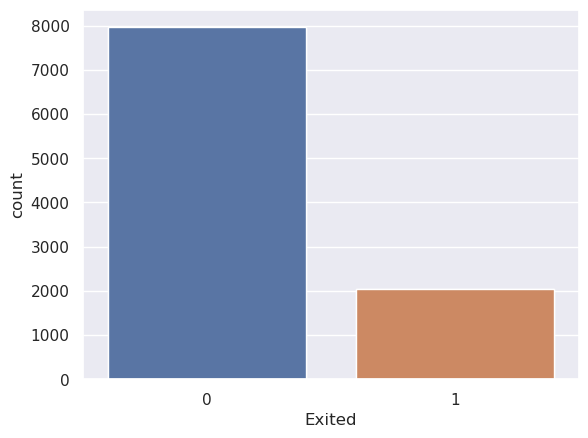

In [27]:
## Observing target distribution
## 
sns.countplot(data=df, x='Exited');
print('VALUE COUNTS')
print(df['Exited'].value_counts())
print(df['Exited'].value_counts(normalize=True)*100)
sns.countplot(x=df['Exited']);

## Drop dependent variables

Remember that Naive Bayes models operate best when there's conditional independence between the predictor variables. When we prepared our data, we engineered a feature called `Loyalty` by dividing `Tenure` by `Age`. Because this new feature is just the quotient of two existing variables, it's no longer conditionally independent. Therefore, we'll drop `Tenure` and `Age` to help adhere to the assumptions of our model.

In [28]:
df.drop(['Tenure', 'Age'], axis=1, inplace=True)

In [29]:
# Define the y (target) variable
y = df['Exited']

# Define the X (predictor) variables
X = df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

## 1. Not Scaled

In [30]:
## Naive Bayes Models from sklearn

gaunb = NB.GaussianNB()
bernb = NB.BernoulliNB()
catnb = NB.CategoricalNB()
comnb = NB.ComplementNB()
mulnb = NB.MultinomialNB()
NBModels = [
    gaunb,
    bernb, 
    catnb,
    comnb,
    mulnb,
]

MODEL: GaussianNB()
Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/home/gato/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


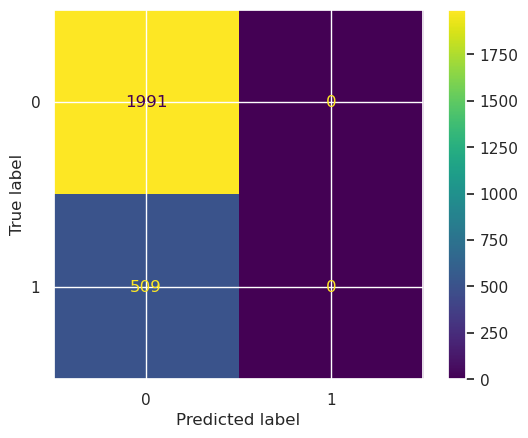

MODEL: BernoulliNB()
Accuracy: 0.796
Precision: 0.400
Recall: 0.008
F1 Score: 0.015


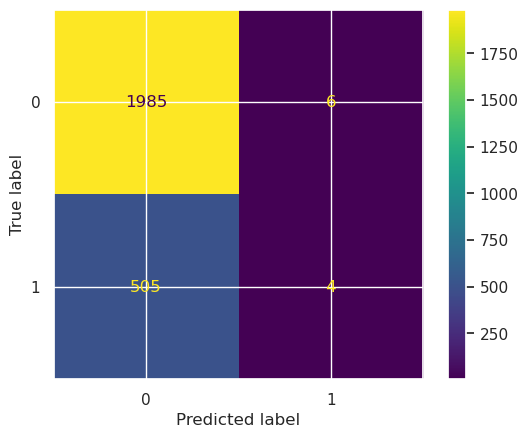

IndexError: index 238387 is out of bounds for axis 1 with size 222268

In [34]:
results = {}

for m in NBModels:
    # Fit the model
    results[m] = m
    m.fit(X_train, y_train)
    m.fit(X_train, y_train).predict(X_test)
    
    ## Scores
    print(f'MODEL: {m}')
    print('Accuracy:', '%.3f' % accuracy_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('Precision:', '%.3f' % precision_score(y_test,m.fit(X_train, y_train).predict(X_test)))
    print('Recall:', '%.3f' % recall_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('F1 Score:', '%.3f' % f1_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    
    ## conf mat
    conf_matrix_plot(m.fit(X_train, y_train), X_test, y_test)

The warning "UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples" means that precision is being set to 0.0 in labels with no predicted samples. You can use the zero_division parameter to control this behavior.

Something that stands out is that the `Loyalty` variable we created is on a vastly different scale than some of the other variables we have, such as `Balance` or `EstimatedSalary`. The maximum value of `Loyalty` is 0.56, while the maximum for `Balance` is over 250,000&mdash;almost six orders of magnitude greater.

In [32]:
## Scales are !=
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


In [33]:
## The model predicts all 
np.unique(y_preds1)

NameError: name 'y_preds1' is not defined

## 2. Scaled data

Some models require you to scale the data in order for them to operate as expected, others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. 

We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset, and it may not be helping that some of our predictor variables are on very different scales. 

In general, scaling might not improve the model, but it probably won't make it worse. Let's try scaling our data. 

- `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

$${x_{scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 



In [35]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

MODEL: GaussianNB()
Accuracy: 0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


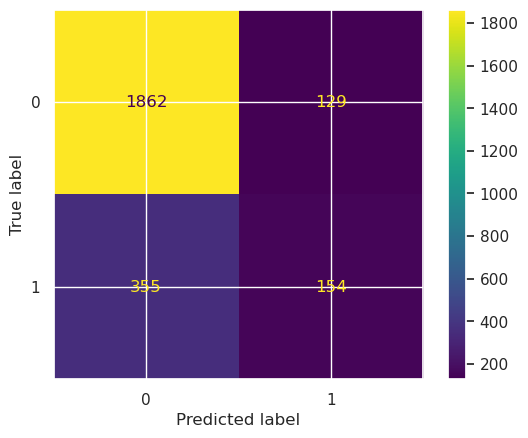

MODEL: BernoulliNB()
Accuracy: 0.802
Precision: 0.541
Recall: 0.193
F1 Score: 0.284


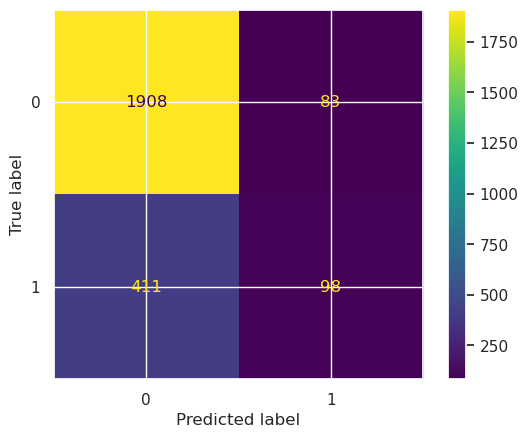

MODEL: CategoricalNB()
Accuracy: 0.803
Precision: 1.000
Recall: 0.033
F1 Score: 0.065


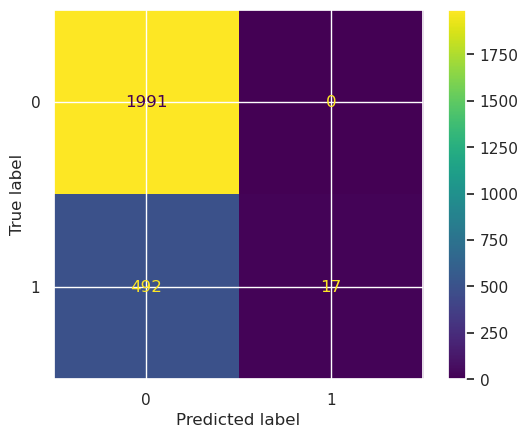

MODEL: ComplementNB()
Accuracy: 0.631
Precision: 0.290
Recall: 0.562
F1 Score: 0.383


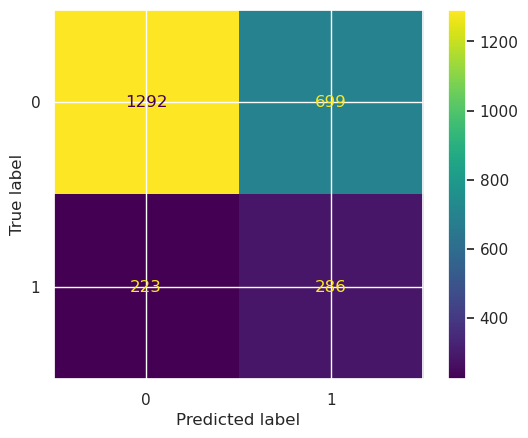

MODEL: MultinomialNB()
Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/home/gato/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


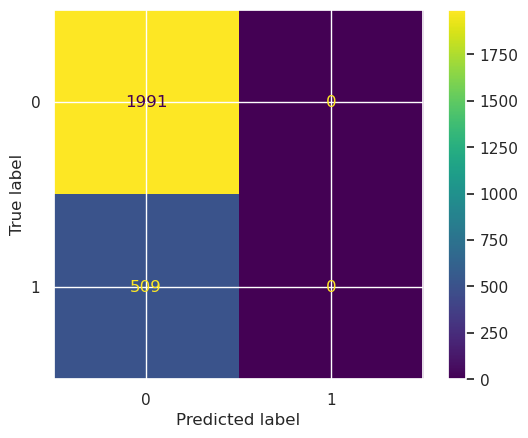

In [36]:
results = {}

for m in NBModels:
    # Fit the model
    results[m] = m
    m.fit(X_train, y_train)
    m.fit(X_train, y_train).predict(X_test)
    
    ## Scores
    print(f'MODEL: {m}')
    print('Accuracy:', '%.3f' % accuracy_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('Precision:', '%.3f' % precision_score(y_test,m.fit(X_train, y_train).predict(X_test)))
    print('Recall:', '%.3f' % recall_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    print('F1 Score:', '%.3f' % f1_score(y_test, m.fit(X_train, y_train).predict(X_test)))
    
    ## conf mat
    conf_matrix_plot(m.fit(X_train, y_train), X_test, y_test)